# Building your first model with `fastai`

In [1]:
# Import libraries
import torch
from fastai.vision.all import *

In [2]:
# Verify the default device is an NVIDIA GPU
print(torch.cuda.get_device_name(0))

GeForce RTX 2070 with Max-Q Design


## Image Classification
### Downloading the PETS dataset from fastai's dataset collection

To download data from fastai, we need to use the `untar_data()` function.
```python
untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=file_extract, timeout=4)
```

The keyword `url` accepts a WINDOWS Path returned by `URLs.[dataset_name]`.

```python
# Pass the URLs.PETS path to download the pets dataset.
untar_data(URLs.PETS)
# Path on local machine to download/load the data
>>> Path('C:/Users/chris/.fastai/data/oxford-iiit-pet')
```

Within the WINDOWS path returned by `untar_data`, subpaths exist:
- Path('C:/Users/chris/.fastai/data/oxford-iiit-pet/annotations')
- Path('C:/Users/chris/.fastai/data/oxford-iiit-pet/images') <--- _The path that contains dog and cat images_


A complete list of built-in datasets: https://docs.fast.ai/data.external.html

In [3]:
# Load images from the PETS dataset
path = untar_data(URLs.PETS)/'images'

### Create a function to label each image
Inside of the dataset we'll need to distinguish cat images from dog images. But how? By passing a function to the `label_func` parameter. In practice, the name of a file indicates the label.

To indicate if an image is a cat or a dog, we can create a function called `is_cat`. It returns True if the file name is uppercased [Cat image], False otherwise [Dog image].

In [4]:
# Create a simple lambda function.
def is_cat(x): return x[0].isupper()

### Create a dataset of dog and cat images

In [5]:
# Create a dataset of Dog and Cat images
dls = ImageDataLoaders.from_name_func(path,
                                      # Get image files in path recursively, only in folders, if specified.
                                      get_image_files(path),
                                      # Random 20% of the dataset is reserved for validation
                                      valid_pct=0.2,
                                      # Function is applied to the name of each file
                                      label_func=is_cat,
                                      # Resize the images to 224
                                      item_tfms=Resize(224),
                                      # Random seed for reproducibility
                                      seed=369,
                                      # Device to use
                                      device='cuda',
                                      # Set to 0 in WINDOWS environment
                                      num_workers=0
                                     )

### Create a model: Convolutional Neural Network
To create a model that classifies cat and dog images, we can use the ResNet34 architecture. ResNet34 was pretrained using 1.3 million images. Using a pretrained model is valuaeble because it reduces the time, money, and resources need to train a model. The __metric__ used to measure performance of the model using the validation set.

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

### Fine tune the pretrained ResNet34 model to recognize cat and dog images
When using a pretrained model, we need to __fine_tune__ it to our image classification problem: Is the image a cat or a dog? `.fit_tine()` fits the model to the data while __keeping the weights from ResNet34__. The integer passed into `fine_tune()` indicates the number of times our model will view each image.

In [7]:
# Train the model: View each image in the dataset twice.
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.140551,0.021305,0.004736,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.054366,0.034639,0.008796,01:05
1,0.019305,0.018551,0.006089,01:07


### Display the target label and the predicted label

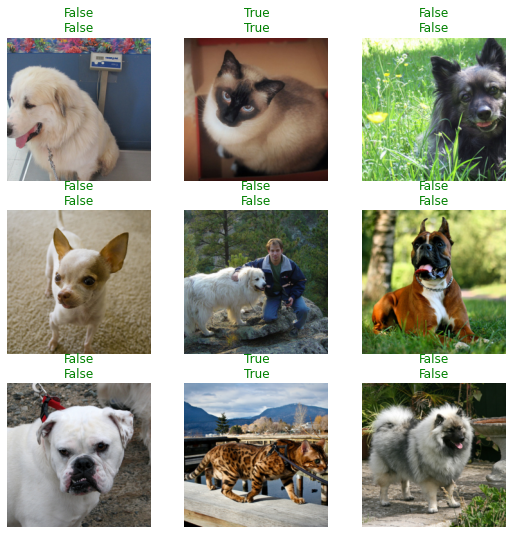

In [8]:
# Displays 9 randomly selected dog and cat images.
# True=Cat, False=Dog
learn.show_results()

## Image Classification: Segmentation

In [9]:
import gc 

# Your code with pytorch using GPU

gc.collect()
torch.cuda.empty_cache()

In [10]:
path = untar_data(URLs.CAMVID_TINY)

In [11]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str),
    seed=369,
    num_workers=0
)

In [12]:
learn = unet_learner(dls, resnet50)
learn.fine_tune(10)

epoch,train_loss,valid_loss,time


RuntimeError: CUDA out of memory. Tried to allocate 288.00 MiB (GPU 0; 8.00 GiB total capacity; 4.24 GiB already allocated; 0 bytes free; 4.67 GiB reserved in total by PyTorch)

In [ ]:
learn.show_results(max_n=10)